# Intro to TensorFlow

## Backpropagation on zero hidden layer classification case

\begin{align}
z_i =& Wx_i\\
a_i =& \sigma(z_i)
\end{align}
where $\sigma(z_i) = 1/(1+exp(-z_i))$ is the sigmoid function and the loss function is $$\mathcal{L} = \frac{1}{2N}\sum_i (y_i-a_i)^2$$.

We need to adjust the $W$ to minimise the loss function. We use the chain rule:
\begin{align}
\frac{d \mathcal{L}}{dW} =& \sum_i \frac{d\mathcal{L}}{da_i}\frac{da_i}{dz_i}\frac{dz_i}{dW}\\
=& \frac{1}{N}\sum_i -(y_i-a_i)\cdot\frac{\exp(-z)}{(1+\exp(-z))^2}\cdot x_i\\
=& \frac{1}{N}\sum_i -(y_i-a_i)\cdot a_i(1-a_i)\cdot x_i
\end{align}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

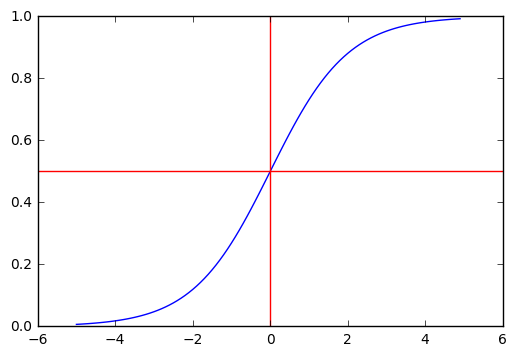

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.arange(-5,5,0.1)

plt.plot(z,sigmoid(z))
plt.plot([0,0],[0,1],'r')
plt.plot([-6,6],[0.5,0.5],'r')

In [3]:
N = 1000
D = 5

X = 5*np.random.randn(N,D)
w = np.random.randn(D,1)
y = X.dot(w)

y[y<=0] = 0 
y[y>0] = 1

In [31]:
def dL_dw(X,e,a):
    return -X.T.dot(e*a*(1-a))/len(X)

def gradient_descent(gamma=5e-1, n_epochs=1000, batch_size=100, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    w = np.random.randn(D,1)
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X),batch_size,replace=False)
            a = sigmoid(X[idx].dot(w)) # Activation function
            e = y[idx] - a # Really important that you use y_obs and not y (you do not have access to true y)
            #update parameters
            w = w - gamma*dL_dw(X[idx],e,a)
        loss[i] = 0.5*e.T.dot(e)/len(e)    
        gamma = gamma*decay #decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

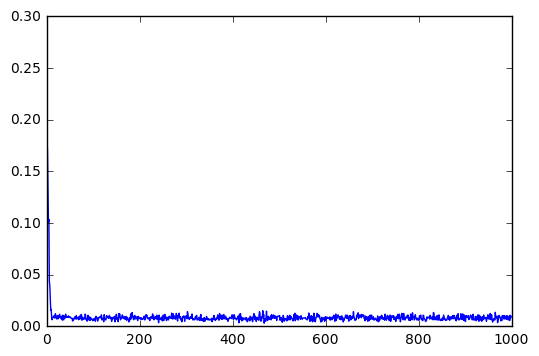

In [32]:
plt.plot(loss)

In [33]:
np.hstack([params[-1],w])

array([[-1.46670479, -2.7368675 ],
       [ 0.64419813,  1.14573091],
       [-0.47072126, -0.86550068],
       [ 0.12093584,  0.22354711],
       [ 0.29427657,  0.55195501]])

In [34]:
idx = np.random.choice(len(X),20,replace=False)
a = sigmoid(X[idx].dot(w)) # Activation function
e = y[idx] - a
0.5*e.T.dot(e)/len(e)

array([[ 0.00271073]])

In [35]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(params[-1])) # Get a probability measure given X
y_inferred[y_inferred>0.5] = 1
y_inferred[y_inferred<=0.5] = 0

np.sum(y_test==y_inferred)

99

## Cross Entropy Error

We shall focus on doing the same as above with a different loss function, the Cross Entropy Loss function.
$$\mathcal{L} = -\frac{1}{N}\sum_i y_i\log(a_i)+(1-y_i)\log(1-a_i)$$.

The following remains the same:
\begin{align}
z_i =& Wx_i\\
a_i =& \sigma(z_i)
\end{align}
and the derivative,
\begin{align}
\frac{d \mathcal{L}}{dW} =& \sum_i \frac{d\mathcal{L}}{da_i}\frac{da_i}{dz_i}\frac{dz_i}{dW}\\
=& \frac{1}{N}\sum_i -\left(\frac{y_i}{a_i}-\frac{1-y_i}{1-a_i}\right)\cdot\frac{\exp(-z)}{(1+\exp(-z))^2}\cdot x_i\\
=& \frac{1}{N}\sum_i -\left(\frac{y_i-a_i}{a_i(1-a_i)}\right)\cdot a_i(1-a_i)\cdot x_i\\
=& \frac{1}{N}\sum_i -(y_i-a_i)\cdot x_i
\end{align}

In [27]:
from IPython.core.debugger import Tracer;

def dL_dw(X,e,a):
    return -X.T.dot(e)/len(X)

def gradient_descent(gamma=1e-2, n_epochs=1000, batch_size=100, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    # NOTE: I initialised w such that its variance is 1/D
    w = np.random.randn(D,1)*(1/np.sqrt(D))
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X),batch_size,replace=False)
            a = sigmoid(X[idx].dot(w)) # Activation function
            e = y[idx] - a # Really important that you use y_obs and not y (you do not have access to true y)  
            w = w - gamma*dL_dw(X[idx],e,a)
#         
        loss[i] = -np.mean(y[idx]*np.log(a+1e-10)+(1-y[idx])*np.log(1-a+1e-10))
        gamma = gamma*decay #decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

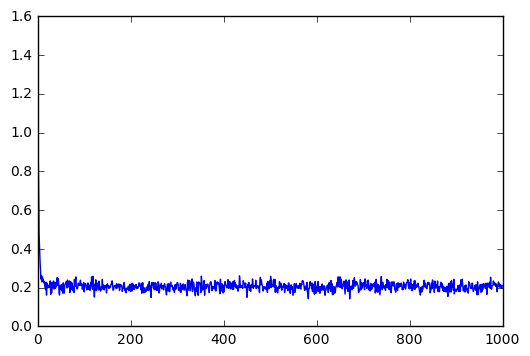

In [28]:
plt.plot(loss)

In [29]:
np.hstack([params[-1],w])

array([[-0.50998383, -2.7368675 ],
       [ 0.23699757,  1.14573091],
       [-0.13707258, -0.86550068],
       [ 0.06313438,  0.22354711],
       [ 0.0992678 ,  0.55195501]])

In [30]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(params[-1])) # Get a probability measure given X
y_inferred[y_inferred>0.5] = 1
y_inferred[y_inferred<=0.5] = 0

np.sum(y_test==y_inferred)

98

## Tensorflow Introduction

In [36]:
import tensorflow as tf

In [45]:
def tf_train(X_train, y_train, batch_size=20):
    # Dataset (inputs and labels)
    x = tf.placeholder(tf.float32, [None, D])
    y_ = tf.placeholder(tf.float32, [None, 1])
    
    # random variable
    W = tf.Variable(tf.random_normal([D, 1],stddev=1/np.sqrt(D)))
    
    # map X to inferred output function
    a = tf.sigmoid(tf.matmul(x, W))

    # Define loss and optimizer
    cross_entropy = tf.reduce_mean(-(y_*tf.log(a)+(1-y_)*tf.log(1-a)))
    train_step = tf.train.GradientDescentOptimizer(1e-2).minimize(cross_entropy)

    sess = tf.InteractiveSession()
    tf.initialize_all_variables().run()
    # Train
    for epoch in range(1000):
        idx = np.random.choice(len(X_train),batch_size,replace=False)
        _,l = sess.run([train_step, cross_entropy], feed_dict={x: X_train[idx], y_: y_train[idx]})
        if epoch%100 == 0:
            print('loss: '+str(l))
        

In [46]:
tf_train(X,y)

loss: 1.24389
loss: 0.197636
loss: 0.103187
loss: 0.109315
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan


In [56]:
def tf_train(X_train, y_train, batch_size=20, n_epoch=1000):
    x = tf.placeholder(tf.float32, [None, D])
    W = tf.Variable(tf.random_normal([D, 1],stddev=1/np.sqrt(D)))

    # Define loss and optimizer
    y_ = tf.placeholder(tf.float32, [None, 1])

    cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(tf.matmul(x,W),y_))
    train_step = tf.train.GradientDescentOptimizer(1e-2).minimize(cross_entropy)

    sess = tf.InteractiveSession()
    tf.initialize_all_variables().run()
    # Train
    for epoch in range(n_epoch):
        idx = np.random.choice(len(X_train),batch_size,replace=False)
        _,l = sess.run([train_step, cross_entropy], feed_dict={x: X_train[idx], y_: y_train[idx]})
        if epoch%100 == 0:
            print('loss: '+str(l))
            
    return sess.run(W)

In [57]:
w_est = tf_train(X,y)

loss: 3.69936
loss: 0.29315
loss: 0.171762
loss: 0.154002
loss: 0.195182
loss: 0.178514
loss: 0.143999
loss: 0.131142
loss: 0.0805718
loss: 0.116589


In [59]:
np.hstack([w_est,w])

array([[-1.31309998, -2.7368675 ],
       [ 0.57441157,  1.14573091],
       [-0.42174405, -0.86550068],
       [ 0.09112696,  0.22354711],
       [ 0.26287264,  0.55195501]])

In [60]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(w_est)) # Get a probability measure given X
y_inferred[y_inferred>0.5] = 1
y_inferred[y_inferred<=0.5] = 0

np.sum(y_test==y_inferred)

100